# Duck × Bidco — Case Answers & Visuals

Run the pipeline first to generate CSVs in `../output/`:

```
python -m src.main --input_path data/Test_Data.xlsx --output_dir output run-all
```

### 1. Data Health — Missing/Duplicates/Outliers, Unreliable Entities, Health Scores

In [21]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os
import seaborn as sns
base = os.path.abspath("..")
dq_store = pd.read_csv(os.path.join(base, "output", "data_quality_store.csv"))
dq_sup   = pd.read_csv(os.path.join(base, "output", "data_quality_supplier.csv"))
dq_store.sort_values('data_health_score', ascending=True).head(10)

,Store_Name,rows,missing_rate,dup_rate,neg_qty_rate,bad_rrp_rate,extreme_price_rate,score_completeness,score_uniqueness,score_validity,avg_rrp_std,score_consistency,data_health_score
12,KILIMANI,1330,0.0038,0.0511,0.0008,0.0030,0.0,0.996241,0.948872,0.996992,55.386010,0.000000,83.2782
25,ROYSAMBU,636,0.0000,0.0440,0.0000,0.0000,0.0,1.000000,0.955975,1.000000,40.424285,0.323245,88.5279
30,THOME,1016,0.0000,0.0492,0.0000,0.0000,0.0,1.000000,0.950787,1.000000,37.036839,0.396431,89.4701
31,TOM MBOYA,1021,0.0010,0.0333,0.0000,0.0000,0.0,0.999021,0.966699,1.000000,37.640542,0.383388,89.7224
34,WAIYAKI WAY,957,0.0031,0.0460,0.0000,0.0031,0.0,0.996865,0.954023,0.996865,31.989511,0.505477,91.0304
20,OGINGA ODINGA,517,0.0000,0.0271,0.0000,0.0000,0.0,1.000000,0.972921,1.000000,31.532922,0.515342,91.9177
5,EMBAKASI,1133,0.0018,0.0406,0.0000,0.0018,0.0,0.998235,0.959400,0.998235,29.963496,0.549249,91.9236
1,CHAKA RD,865,0.0035,0.0462,0.0012,0.0023,0.0,0.996532,0.953757,0.997688,27.643633,0.599369,92.4414
27,RUAKA,1008,0.0030,0.0179,0.0000,0.0020,0.0,0.997024,0.982143,0.998016,30.065395,0.547047,92.5311
18,NANYUKI,1190,0.0042,0.0471,0.0008,0.0008,0.0,0.995798,0.952941,0.999160,27.188003,0.609213,92.5794


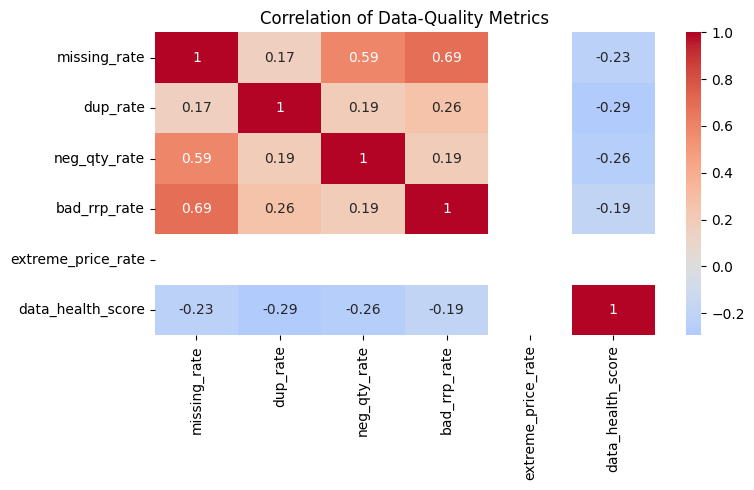

In [22]:
corr = dq_store[[
    "missing_rate","dup_rate","neg_qty_rate","bad_rrp_rate",
    "extreme_price_rate","data_health_score"
]].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Data-Quality Metrics")
plt.tight_layout()
plt.show()

#### Unreliable stores (score < 50 or any error rate > 50%)

In [24]:
crit = (dq_store['data_health_score'] < 50) | (dq_store[['missing_rate','dup_rate','neg_qty_rate','bad_rrp_rate','extreme_price_rate']].max(axis=1) > 0.50)
unreliable = dq_store.loc[crit].copy().sort_values('data_health_score')
unreliable[['Store_Name','data_health_score','missing_rate','dup_rate','neg_qty_rate','bad_rrp_rate','extreme_price_rate']].head(10)

,Store_Name,data_health_score,missing_rate,dup_rate,neg_qty_rate,bad_rrp_rate,extreme_price_rate


#### Top 20 stores by lowest health score

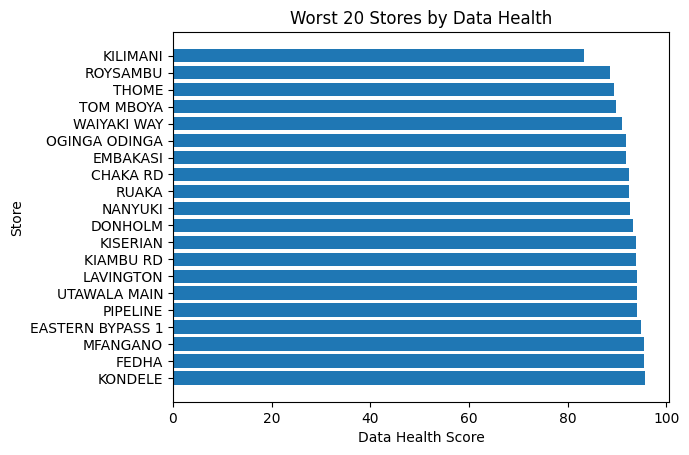

In [26]:
topn = dq_store.sort_values('data_health_score').head(20)
plt.figure()
plt.barh(topn['Store_Name'], topn['data_health_score'])
plt.xlabel('Data Health Score'); plt.ylabel('Store'); plt.title('Worst 20 Stores by Data Health'); plt.gca().invert_yaxis()
plt.show()

### 2. Promotions & Performance — Uplift, Coverage, Price Impact, Baseline vs Promo Price, Top SKUs

In [38]:
promo = pd.read_csv(os.path.join(base, "output", "promo_summary.csv")).fillna(0)
promo[['Item_Code','Description','Supplier','promo_uplift_pct','promo_coverage_sku','avg_discount_depth_all','baseline_avg_price','promo_avg_price']].head(10)

,Item_Code,Description,Supplier,promo_uplift_pct,promo_coverage_sku,avg_discount_depth_all,baseline_avg_price,promo_avg_price
0,220552,ZKL HANAN ANTIBACTERIAL WIPES 20S,ZENKO KENYA LIMITED,0.0,0.0,0.042877,112.068901,112.068901
1,230295,PC-PAMPERS PANTS JR U/SEX HC 4*22- SZ6,HASBAH KENYA LTD,0.0,0.0,0.120292,990.517212,990.517212
2,230412,PC-MOLFIX PANTSMAXI 8+1*8 S.P KE9.1-15KG,HAYAT KIMYA KENYA HYGIENIC PRODUCTS LIMITED,0.0,0.0,-0.067966,214.655106,214.655106
3,231393,PC-MOLFIX PANTS ELARGE 7+1*8 SMALL PACK,HAYAT KIMYA KENYA HYGIENIC PRODUCTS LIMITED,0.0,0.0,0.006772,214.655106,214.655106
4,231399,PC - HML SOFTCARE BABY WIPES 80S,SOFTCARE KENYA LIMITED,0.0,0.0,-0.037078,207.389141,217.939227
5,231399,PC-HML SOFTCARE BABY WIPES 80S,SOFTCARE KENYA LIMITED,0.0,0.0,-0.037078,207.389141,217.939227
6,280162,HC-TKL HARPIC ACTIVE CITRUSTWINPACK500ML,TOWFIQ (K) LIMITED,0.0,0.0,-0.047020,775.862000,775.862000
7,280162,HC-HARPIC POWERPLUS CITRUSTWIN PACK500ML,TOWFIQ (K) LIMITED,0.0,0.0,-0.047020,775.862000,775.862000
8,280165,HC-TKL HARPIC POWER PLUS ORIGINAL 500ML,TOWFIQ (K) LIMITED,0.0,0.0,0.090393,517.241272,517.241272
9,280207,HC-HURRICANE T/CLEANER OCEAN 250ML,SUPERSLEEK LIMITED,0.0,0.0,-0.043344,87.069000,87.069000


#### Top 10 SKUs by Promo Uplift %

In [39]:
top_uplift = promo.sort_values('promo_uplift_pct', ascending=False).head(10)
top_uplift[['Item_Code','Description','promo_uplift_pct','promo_coverage_sku']].reset_index(drop=True)

,Item_Code,Description,promo_uplift_pct,promo_coverage_sku
0,220552,ZKL HANAN ANTIBACTERIAL WIPES 20S,0.0,0.0
1,410551,FD-CKL DAIRYMILK BUBBLY CHOC 28G,0.0,0.0
2,410464,FD-CKL CADBURY LUNCH BAR 44/48G RED,0.0,0.0
3,410485,FD-CKL CADBURY DAIRYMILK CHOC 150G,0.0,0.0
4,410485,FD-CKL CADBURY DAIRYMILK CHOC 150G,0.0,0.0
5,410491,FD-KENAFRIC BIG LOLLIPOP PASSION 1PC,0.0,0.0
6,410491,FD-KENAFRIC BIG LOLLIPOP PASSION 1PC,0.0,0.0
7,410493,FD-NESTLE KITKAT 4 FINGER MILK 41.5G,0.0,0.0
8,410493,FD-NESTLE KITKAT 4 FINGER MILK 41.5G,0.0,0.0
9,410535,FD-HKL KINDER JOY BOY 20G,0.0,0.0


### Top 10 SKUs by Coverage %

In [40]:
top_cov = promo.sort_values('promo_coverage_sku', ascending=False).head(10)
top_cov[['Item_Code','Description','promo_coverage_sku','promo_uplift_pct']].reset_index(drop=True)

,Item_Code,Description,promo_coverage_sku,promo_uplift_pct
0,220552,ZKL HANAN ANTIBACTERIAL WIPES 20S,0.0,0.0
1,410551,FD-CKL DAIRYMILK BUBBLY CHOC 28G,0.0,0.0
2,410464,FD-CKL CADBURY LUNCH BAR 44/48G RED,0.0,0.0
3,410485,FD-CKL CADBURY DAIRYMILK CHOC 150G,0.0,0.0
4,410485,FD-CKL CADBURY DAIRYMILK CHOC 150G,0.0,0.0
5,410491,FD-KENAFRIC BIG LOLLIPOP PASSION 1PC,0.0,0.0
6,410491,FD-KENAFRIC BIG LOLLIPOP PASSION 1PC,0.0,0.0
7,410493,FD-NESTLE KITKAT 4 FINGER MILK 41.5G,0.0,0.0
8,410493,FD-NESTLE KITKAT 4 FINGER MILK 41.5G,0.0,0.0
9,410535,FD-HKL KINDER JOY BOY 20G,0.0,0.0


### Discount depth vs Promo Uplift %

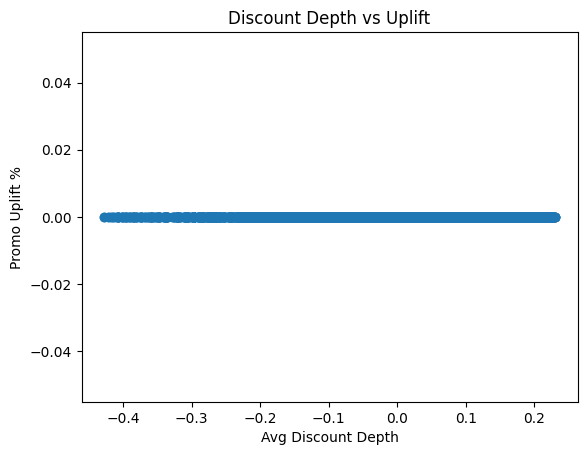

In [41]:
sc = promo[['avg_discount_depth_all','promo_uplift_pct']].dropna()
plt.figure()
plt.scatter(sc['avg_discount_depth_all'], sc['promo_uplift_pct'])
plt.xlabel('Avg Discount Depth'); plt.ylabel('Promo Uplift %'); plt.title('Discount Depth vs Uplift')
plt.show()

#### Baseline vs Promo Avg Price (Top 15 SKUs by uplift)

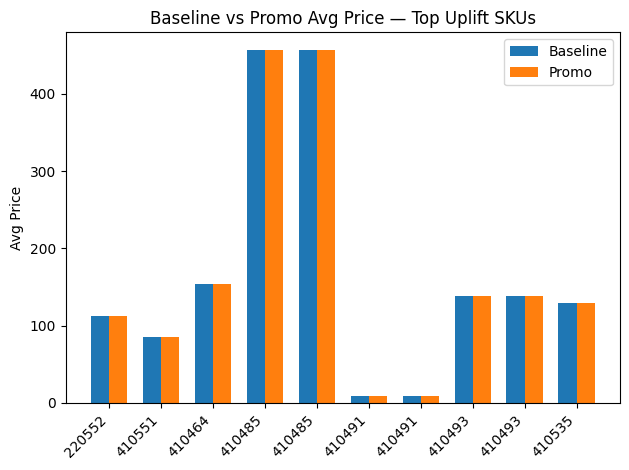

In [42]:
tf = top_uplift[['Item_Code','baseline_avg_price','promo_avg_price']].dropna().head(15)
import numpy as np
x = np.arange(len(tf))
w = 0.35
plt.figure()
plt.bar(x - w/2, tf['baseline_avg_price'], width=w, label='Baseline')
plt.bar(x + w/2, tf['promo_avg_price'], width=w, label='Promo')
plt.xticks(x, tf['Item_Code'], rotation=45, ha='right')
plt.ylabel('Avg Price'); plt.title('Baseline vs Promo Avg Price — Top Uplift SKUs')
plt.legend()
plt.tight_layout()
plt.show()

### 3. Pricing Index — Store View and Roll-up

In [43]:
pidx = pd.read_csv(os.path.join(base, "output", "price_index.csv"))
roll = pd.read_csv(os.path.join(base, "output", "price_index_rollup.csv"))
roll

,bidco_avg_price_rollup,peer_avg_price_rollup,price_index_rollup
0,264.457613,143.17629,1.847077


#### Price Index by Store (mean across sub-dept/section)

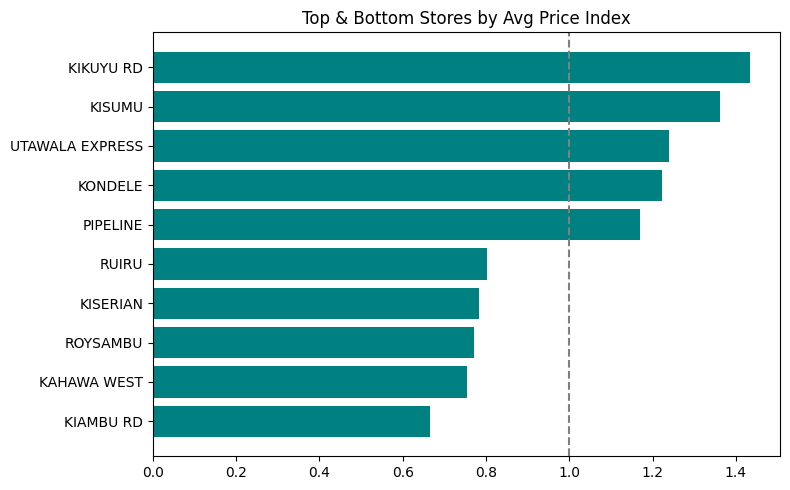

In [47]:
store_mean = pidx.groupby('Store_Name')['price_index'].mean().dropna().sort_values()
n = 5
subset = pd.concat([store_mean.head(n), store_mean.tail(n)])
plt.figure(figsize=(8, n))
plt.barh(subset.index, subset.values, color='teal')
plt.axvline(1.0, linestyle='--', color='gray')
plt.title('Top & Bottom Stores by Avg Price Index')
plt.tight_layout()
plt.show()

## 4. Insights — High-ROI Promos and Over-Discounted SKUs

In [11]:
hi_roi = promo[(promo['promo_uplift_pct'] >= 0.40) & (promo['avg_discount_depth_all'] <= 0.15)]
over_disc = promo[(promo['avg_discount_depth_all'] >= 0.25) & (promo['promo_uplift_pct'] <= 0.10)]
hi_roi[['Item_Code','Description','promo_uplift_pct','avg_discount_depth_all']].sort_values('promo_uplift_pct', ascending=False).head(15)

,Item_Code,Description,promo_uplift_pct,avg_discount_depth_all


In [12]:
over_disc[['Item_Code','Description','avg_discount_depth_all','promo_uplift_pct']].sort_values('avg_discount_depth_all', ascending=False).head(15)

,Item_Code,Description,avg_discount_depth_all,promo_uplift_pct
